In [10]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import os

from tensorflow.keras import layers, Model, optimizers
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier

In [11]:
data = pd.read_csv('../data/all_data.csv')

In [12]:
train, test = train_test_split(data, test_size=0.3, stratify=data["Is high risk"], random_state=42)
test, val = train_test_split(test, test_size=0.5, stratify=test["Is high risk"], random_state=42)

In [13]:
X_train = train.drop("Is high risk", axis=1)
Y_train = train["Is high risk"]

X_test = test.drop("Is high risk", axis=1)
Y_test = test["Is high risk"]

X_val = val.drop("Is high risk", axis=1)
Y_val = val["Is high risk"]

In [14]:
x = layers.Input(shape=(X_train.shape[1],))
h = layers.Dense(64, activation='relu')(x)
h = layers.Dense(64, activation='relu')(h)
h = layers.Dense(64, activation='relu')(h)
h = layers.Dense(64, activation='relu')(h)

y = layers.Dense(1, activation='sigmoid')(h)


model = Model(inputs=x, outputs=y)

In [15]:
# implement early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    min_delta=0.001,     # Minimum change to qualify as an improvement
    patience=10,         # How many epochs to wait after last time val loss improved
    verbose=1,
    mode='min',          # The training will stop when the quantity monitored has stopped decreasing
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity.
)

In [16]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 52)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         3,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,937 (62.25 KB)

 Trainable params: 15,937 (62.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
optimizer = optimizers.Adam(learning_rate=0.001, 
                            beta_1=0.9, 
                            beta_2=0.999, 
                            amsgrad=True)

model.compile(optimizer=optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [18]:
batch_size = 32
epochs = 1000

history = model.fit(X_train, 
                    Y_train, 
                    batch_size=batch_size,
                    validation_data=(X_val, Y_val),
                    callbacks=[early_stopping],
                    epochs=epochs)


Epoch 1/1000
798/798 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.9589 - loss: 100.9022 - val_accuracy: 0.9830 - val_loss: 2.5514
Epoch 2/1000
798/798 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.9667 - loss: 7.9182 - val_accuracy: 0.9830 - val_loss: 2.7008
Epoch 3/1000
798/798 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.9684 - loss: 2.4287 - val_accuracy: 0.9826 - val_loss: 0.9320
Epoch 4/1000
798/798 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9686 - loss: 2.0390 - val_accuracy: 0.9830 - val_loss: 0.3185
Epoch 5/1000
798/798 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9708 - loss: 1.0511 - val_accuracy: 0.9808 - val_loss: 0.7572
Epoch 6/1000
798/798 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.9701 - loss: 0.8724 - val_accuracy: 0.9777 - val_loss: 0.4559
Epoch 7/1000
798/798 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.9701 - loss: 0.6267 - val_accuracy: 0.9830 - val_loss: 0.2861
Epoch 8/1000
798/798 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.9729

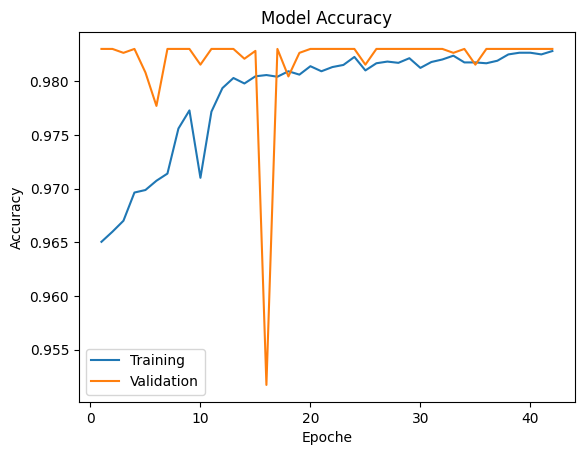

In [19]:
# Print the model training history for accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoche')
plt.legend(['Training', 'Validation'], loc='lower left')
# plt.xticks(np.arange(1, len(accuracy)+1, 1))
plt.show()

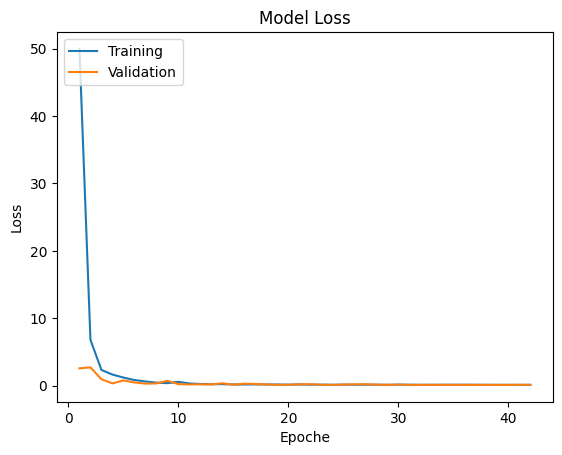

In [20]:
# print the model training history for loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoche')
plt.legend(['Training', 'Validation'], loc='upper left')
# plt.xticks(np.arange(1, len(loss)+1, 1))
plt.show()

In [21]:
model.evaluate(X_test, Y_test)

171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.9834 - loss: 0.0943


[0.09527517855167389, 0.983177900314331]

In [22]:
model.evaluate(X_val, Y_val)

171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.9828 - loss: 0.0945


[0.09245476126670837, 0.9829950928688049]

In [23]:
model.evaluate(X_train, Y_train)

798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.9833 - loss: 0.0926


[0.09246256947517395, 0.9831106066703796]